In [1]:
setwd ("~/WGS/Sequences/Metrics/")

In [2]:
cov=read.table("Coverage_Pool6.txt")

In [3]:
colnames(cov)=c("Scaffold", "depth", "NumBp", "BpTotal", "Percent", "Sample")

In [4]:
cov$percentage=(as.numeric(as.character(cov$Percent)))*100

In [5]:
zero=cov[cov$depth==0,]

In [6]:
head(zero)

,Scaffold,depth,NumBp,BpTotal,Percent,Sample,percentage
1,GL429767,0,18052334,64990205,0.277770,NJ_E_05,27.7770
77,GL429768,0,11221410,39494369,0.284127,NJ_E_05,28.4127
240,GL429769,0,16342656,32863254,0.497293,NJ_E_05,49.7293
345,GL429770,0,8495809,30916457,0.274799,NJ_E_05,27.4799
386,GL429771,0,11789302,22519077,0.523525,NJ_E_05,52.3525
432,GL429772,0,6104472,20945196,0.291450,NJ_E_05,29.1450


In [7]:
zero$Percentage=NULL
zero$Percent=NULL
zero$depth=NULL

In [8]:
require(plyr)

Loading required package: plyr


In [9]:
zero$NumBp=as.numeric(as.character(zero$NumBp))

In [10]:
zero$BpTotal=as.numeric(as.character(zero$BpTotal))

In [11]:
zerosum=ddply(zero, "Sample", numcolwise(sum))

In [12]:
zerosum$percentage=(1-(zerosum$NumBp/zerosum$BpTotal))*100

In [13]:
require(ggplot2)

Loading required package: ggplot2


In [14]:
plot=ggplot(data=zerosum, aes(x=Sample, y=percentage))+
  geom_bar(data=zerosum, stat="identity")+
  theme_bw()+ylab("Percent >= 1x coverage")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

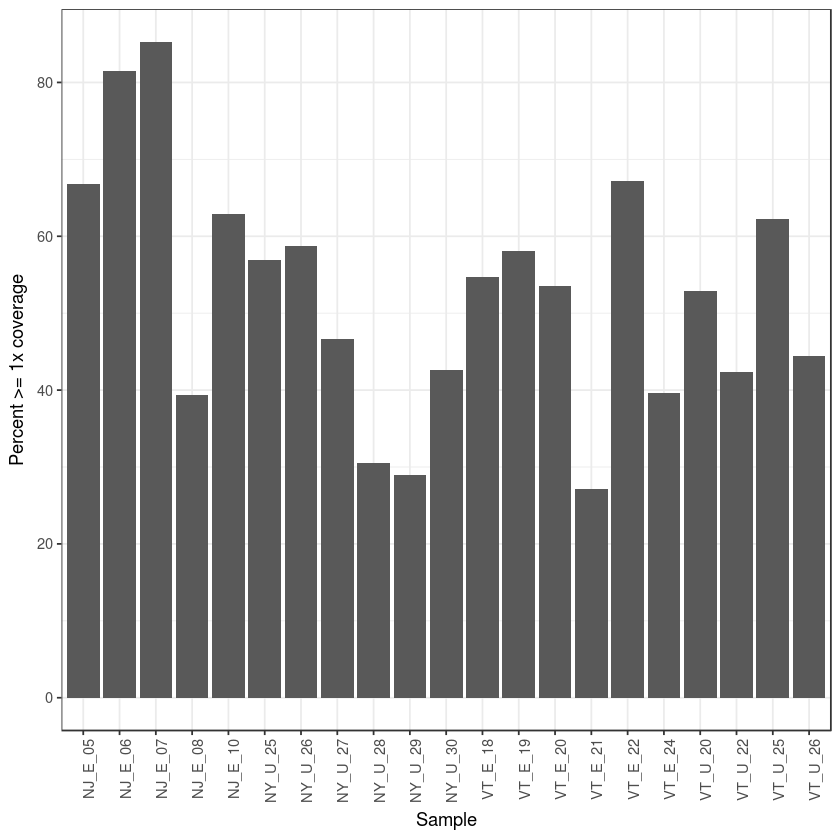

In [15]:
plot